# Tutorial Networkx

### Nodes

Primero debemos importar la libreria de networkx, e inicializamos el grafo vacio

In [11]:
import networkx as nx
G = nx.Graph()

El gráfico G se puede hacer crecer de varias formas. NetworkX incluye muchas funciones de generación de gráficos y facilidades para leer y escribir gráficos en muchos formatos. Sin embargo, para comenzar, veremos manipulaciones simples.
Se puede agregar de a un nodo a la vez asi:

In [12]:
G.add_node(1)

O se pueden agregar nodos de cualquier contenedor iterable, como una lista asi:

In [13]:
G.add_nodes_from([2, 3])

También puede agregar nodos junto con atributos de nodo si su contenedor produce 2 tuplas de la forma (node, node_attribute_dict)

In [14]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

Tambien podemos meter nodos de un grafo dentro de otro grafo. 

In [16]:
H = nx.path_graph(10) #Retorna un grafo de `P_n` nodos conectados linealmente.
G.add_nodes_from(H)

Asi como podemos meter el grafo H como si fuera un nodo de H. Esto puede ser util para la idea de juan Pablo de meter grafos dentro de un grafo, esto se hace asi:

In [17]:
G.add_node(H)

Esta flexibilidad es muy poderosa ya que permite grafos de grafos, grafos de archivos, grafos de funciones y mucho más. Vale la pena pensar en cómo estructurar su aplicación para que los nodos sean entidades útiles. Por supuesto, siempre se puede usar un identificador único en G y tener un diccionario separado codificado por identificador para la información del nodo si lo prefiere.

### Edges

El grafo G también se puede cultivar agregando un arco a la vez:

In [18]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

Agregando una lista de arcos:

In [19]:
G.add_edges_from([(1, 2), (1, 3)])

O tambien se puede hacer agregando un montón de arcos. Un ebunch es cualquier contenedor iterable de tuplas de arcos. Una tupla de arcos puede ser una tupla de 2 nodos o una tupla de 3 con 2 nodos seguidos de un diccionario de atributos de borde (es decir, lo podemos utilizar para conectarlo directamente con que, por ejemplo, se conecta 2 paginas con un numero de telefono especifico, el arco va a tener el valor de ese numero), por ejemplo, (2, 3, {'peso': 3.1415}). Los atributos de borde se analizan más adelante.

In [20]:
G.add_edges_from(H.edges)

Para eliminar todos los nodos y arcos se usa el comando:

In [21]:
G.clear()

In [23]:
#creamos un nuevo grafo:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [24]:
G.number_of_nodes()

8

In [25]:
G.number_of_edges()

3

### Examining elements of a graph

Podemos examinar los nodos y los arcos. Cuatro propiedades básicas del grafo facilitan la generación de informes: G.nodes, G.edges, G.adj y G.degree. Estas son vistas en forma de conjunto de los nodos, los arcos, vecinos (adyacencias) y grados de nodos en un grafo. Ofrecen una vista de solo lectura actualizada continuamente en la estructura del grafo. También son similares a dictados en el sentido de que puede buscar atributos de datos de nodo y un arco a través de las vistas e iterar con atributos de datos utilizando los métodos .items (), .data ('span'). Si desea un tipo de contenedor específico en lugar de una vista, puede especificar uno. Aquí usamos listas, aunque los conjuntos, dictados, tuplas y otros contenedores pueden ser mejores en otros contextos.

In [29]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [30]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [31]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [32]:
G.degree[1]  # the number of edges incident to 1

2

Se puede especificar que se informe de los arcos y el grado de un subconjunto de todos los nodos utilizando un nbunch

In [33]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [34]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

### Removing elements from a graph

Se pueden eliminar nodos y arcos del grafo de forma similar a la adición. Utilice los métodos Graph.remove_node (), Graph.remove_nodes_from (), Graph.remove_edge () y Graph.remove_edges_from ()

In [35]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

In [36]:
G.remove_edge(1, 3)

### Using the graph constructors

Los objetos de los grafos no tienen que construirse de forma incremental; los datos que especifican la estructura del grafo se pueden pasar directamente a los constructores de las distintas clases de grafos. Al crear una estructura de grafo mediante la instanciación de una de las clases del grafo, puede especificar datos en varios formatos.

In [37]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [38]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

Observe que los nodos y los arcos no se especifican como objetos NetworkX. Esto le deja libre para usar elementos significativos como nodos y arcos. Las opciones más comunes son números o cadenas, pero un nodo puede ser cualquier objeto hash (excepto Ninguno), y un arco puede asociarse con cualquier objeto x usando G.add_edge (n1, n2, object = x).

### Accessing edges and neighbors

Además de las vistas Graph.edges y Graph.adj, el acceso a los arcos y vecinos es posible mediante la notación de subíndices.

In [39]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [41]:
G[1][2] 

{'color': 'yellow'}

In [42]:
G.edges[1, 2]

{'color': 'yellow'}

Puede obtener/establecer los atributos de un arco usando la notación de subíndice si el arco ya existe.

In [43]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

El examen rápido de todos los pares (nodo, adyacencia) se logra utilizando G.adjacency () o G.adj.items (). Tenga en cuenta que para los grafos no dirigidos, la iteración de adyacencia ve cada arco dos veces.

In [44]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


El acceso conveniente a todos los arcos se logra con la propiedad de arcos.

In [45]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


### Adding attributes to graphs, nodes, and edges

Los atributos como pesos, etiquetas, colores o cualquier objeto de Python que desee, se pueden adjuntar a gráficos, nodos o arcos.

Cada grafo, nodo y arco puede contener pares de atributos clave / valor en un diccionario de atributos asociado (las claves deben ser hash). Por defecto, estos están vacíos, pero los atributos se pueden agregar o cambiar usando add_edge, add_node o la manipulación directa de los diccionarios de atributos llamados G.graph, G.nodes y G.edges para un gráfico G.

- Se puede agregar un atributo a un grafo cuando se crea, de la siguiente forma:

In [46]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Sin embargo, para modificarlo posteriormente se utiliza:

In [47]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

- Para los atributos de los nodos se usa add_node(), add_nodes_from(), o G.nodes

In [48]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [49]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

- Para los atributos de los arcos se usa add_edge(), add_edges_from()

In [50]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

El atributo especial weight tiene que ser numerico, pues se utiliza para algoritmos con grafos pesados

### Directed graphs

La clase DiGraph proporciona métodos y propiedades adicionales específicas para los arcos dirigidos, por ejemplo, DiGraph.out_edges, DiGraph.in_degree, DiGraph.predecessors (), DiGraph.successors () etc. 

In [51]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [52]:
DG.degree(1, weight='weight')

1.25

In [53]:
list(DG.successors(1))

[2]

In [54]:
list(DG.neighbors(1))

[2]

Algunos algoritmos funcionan solo para grafos dirigidos y otros no están bien definidos para grafos dirigidos. De hecho, la tendencia a agrupar grafos dirigidos y no dirigidos es peligrosa. Si desea tratar un grafo dirigido como no dirigido para alguna medición, probablemente debería convertirlo usando Graph.to_undirected () o con:

In [55]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

### Multigraphs

NetworkX proporciona clases para grafos que permiten múltiples arcos entre cualquier par de nodos. Las clases MultiGraph y MultiDiGraph le permiten agregar el mismo arco dos veces, posiblemente con diferentes datos en el arco. Esto puede ser poderoso para algunas aplicaciones, pero muchos algoritmos no están bien definidos en tales grafos. Cuando los resultados están bien definidos, por ejemplo, MultiGraph.degree () proporcionamos la función. De lo contrario, debería convertir a un grafo estándar de forma que la medición esté bien definida.

In [57]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [58]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)



In [59]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

### Analyzing graphs

Se puede analizar el grafo G utilizando diferentes funciones como:

In [61]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [62]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [63]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

### Drawing graphs

NetworkX no es principalmente un paquete de dibujo de grafos, sino que se incluyen dibujos básicos con Matplotlib, así como una interfaz para usar el paquete de software Graphviz de código abierto.Esto, usando el módulo networkx.drawing:

Lo que primero se debe hacer es importar matplotlib:

In [64]:
import matplotlib.pyplot as plt

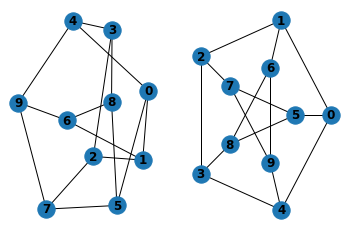

In [67]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

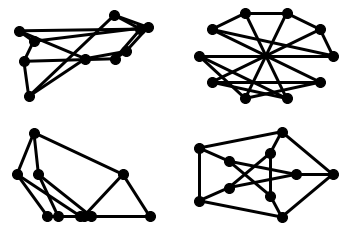

In [69]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

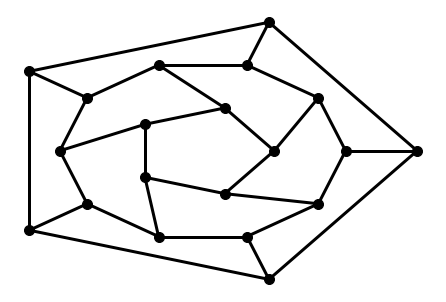

In [70]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

Para guardar los dibujos se utiliza:

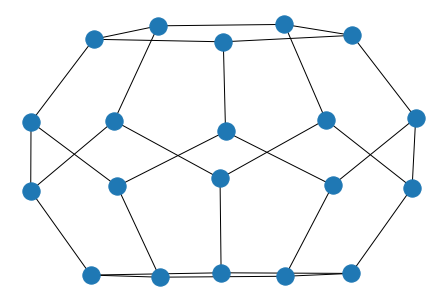

In [71]:
nx.draw(G)
plt.savefig("prueba1.png")

Si Graphviz y PyGraphviz o pydot están disponibles en su sistema, también puede usar nx_agraph.graphviz_layout (G) o nx_pydot.graphviz_layout (G) para obtener las posiciones de los nodos, o escribir el grafo en formato de puntos para su posterior procesamiento.

In [73]:
#from networkx.drawing.nx_pydot import write_dot
#pos = nx.nx_agraph.graphviz_layout(G)
#nx.draw(G, pos=pos)
#write_dot(G, 'file.dot')

Para encontrar el tutorial y documentacion completos buscar en las siguientes paginas:
https://networkx.github.io/
https://networkx.github.io/documentation/stable/tutorial.html